# Summary

```Objective```

todo

```Methods```

todo

```Results```

todo

# Config

# Libs

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from misalign.data.Kaggle_datamodule import KaggleDataModule
import nibabel as nib
import h5py

def show_img(img):
    plt.figure(dpi=150)
    im = plt.imshow(img, cmap='gray')
    cbar = plt.colorbar(im, shrink=0.5)
    im.set_clim(vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

c:\Users\NUGURI\anaconda3\envs\misalign\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Analysis

In [2]:
dataroot = 'C:/Users/NUGURI/Workspace/misalign-benchmark/data/masked_Kaggle/test/te_masked_data_91_120.mat'
mat = h5py.File(dataroot, 'r')
print(mat.keys())

accumulated_MRI = np.array(mat['data_x'])
accumulated_CT = np.array(mat['data_y'])

print('MRI size:', accumulated_MRI.shape)
print('CT size:', accumulated_CT.shape)
mat.close()

<KeysViewHDF5 ['data_x', 'data_y']>
MRI size: (30, 256, 256)
CT size: (30, 256, 256)


In [3]:
dataroot = 'C:/Users/NUGURI/Workspace/misalign-benchmark/data/masked_Kaggle/test/tr_masked_data_211_300.mat'
mat = h5py.File(dataroot, 'r')
print(mat.keys())

raw_MRI = np.array(mat['data_x'])

raw_CT = np.array(mat['data_y'])

print('MRI size:', raw_MRI.shape)
print('CT size:', raw_CT.shape)
mat.close()

accumulated_MRI = np.concatenate((accumulated_MRI, raw_MRI),0)
print('accumulated_MRI size:', accumulated_MRI.shape)

accumulated_CT = np.concatenate((accumulated_CT, raw_CT),0)
print('accumulated_CT size:', accumulated_CT.shape)

# zz = 50
# show_img(np.concatenate((raw_MRI[zz,:,:], raw_CT[zz,:,:]),1))

# for zz in range(0,10):
#     show_img(np.concatenate((raw_MRI[zz,:,:].squeeze(), raw_CT[zz,:,:].squeeze()),1))

<KeysViewHDF5 ['data_x', 'data_y']>
MRI size: (90, 256, 256)
CT size: (90, 256, 256)
accumulated_MRI size: (120, 256, 256)
accumulated_CT size: (120, 256, 256)


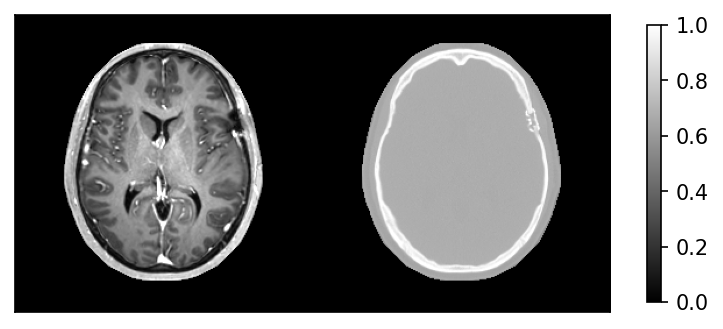

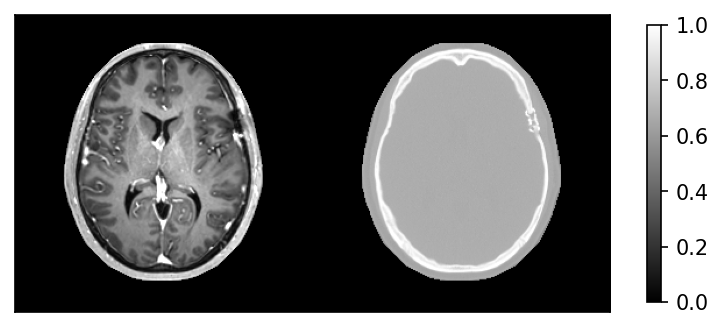

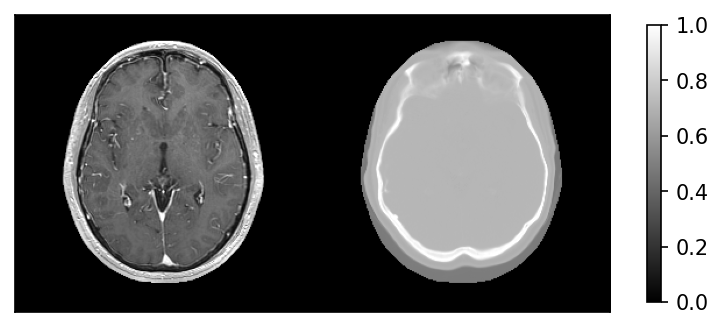

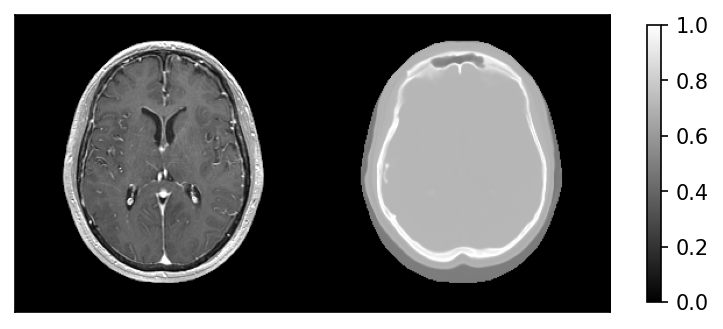

In [4]:
for zz in range(28,32):
    show_img(np.concatenate((accumulated_MRI[zz,:,:].squeeze(), accumulated_CT[zz,:,:].squeeze()),1))

In [5]:
# HDF5 파일로 저장하기
hdf5_file_path = 'C:/Users/NUGURI/Workspace/misalign-benchmark/data/masked_Kaggle/test/masked_test.mat'
with h5py.File(hdf5_file_path, 'w') as file:
    file.create_dataset('data_x', data=accumulated_MRI)
    file.create_dataset('data_y', data=accumulated_CT)

print("Data successfully saved as HDF5 file.")

Data successfully saved as HDF5 file.
